# Step 1: Load and Inspect the Data
Objective
- Load the dataset.
- Check for missing values, duplicates, and data types.
- Rename columns for clarity.


In [2]:
# Required Imports
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)

In [3]:
# Load the dataset
df = pd.read_csv('HR_comma_sep.csv')

# Preview the data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Initial Inspection
# Check shape and basic info
print("Shape:", df.shape)
df.info()

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

Shape: (14999, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Missing values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left   

In [5]:
# Clean the data
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Rename 'sales' column to 'department' for clarity
df.rename(columns={'sales': 'department'}, inplace=True)

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [6]:
# Unique values in Categorical Columns
print("\nUnique departments:", df['department'].unique())
print("Unique salary levels:", df['salary'].unique())


Unique departments: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Unique salary levels: ['low' 'medium' 'high']


In [7]:
# Check for placeholder strings in object-type columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: department
department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

Column: salary
salary
low       5740
medium    5261
high       990
Name: count, dtype: int64


# Step 2: Exploratory Data Analysis (EDA)
Objective
- Understand feature distributions and relationships.
- Identify patterns linked to employee turnover.
- Visualize correlations and categorical impacts.

In [8]:
# Required Imports (already loaded earlier)
# Already imported:
# import seaborn as sns
# import matplotlib.pyplot as plt

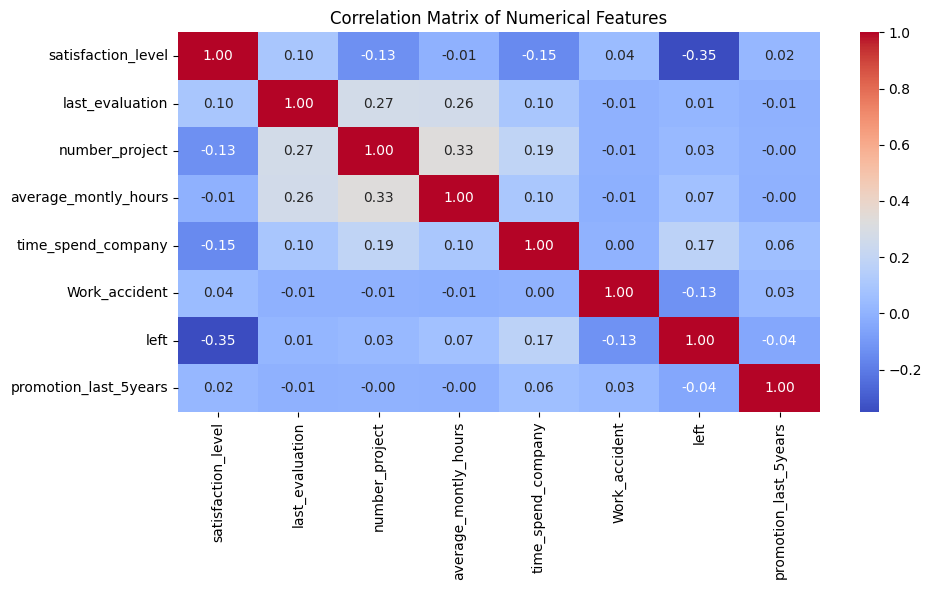

In [9]:
# 1. Correlation Heatmap
# Compute correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()

plt.savefig('correlation_matrix_heatmap.png')

plt.show()

# This helps identify which features are most associated with turnover (left).

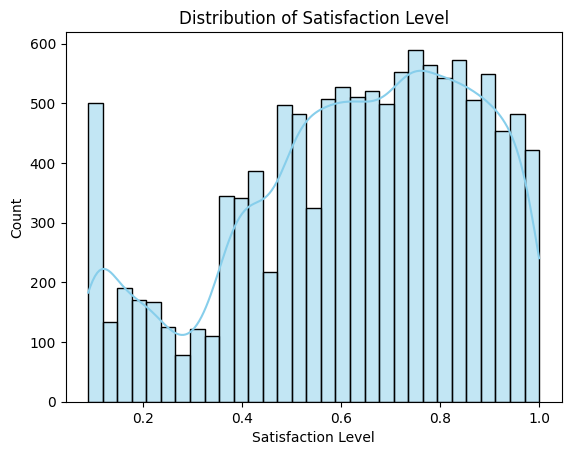

In [10]:
# 2. Distribution Plots
# Satisfaction Level
sns.histplot(df['satisfaction_level'], kde=True, color='skyblue')
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')

plt.savefig('satisfaction_level_distribution.png')

plt.show()


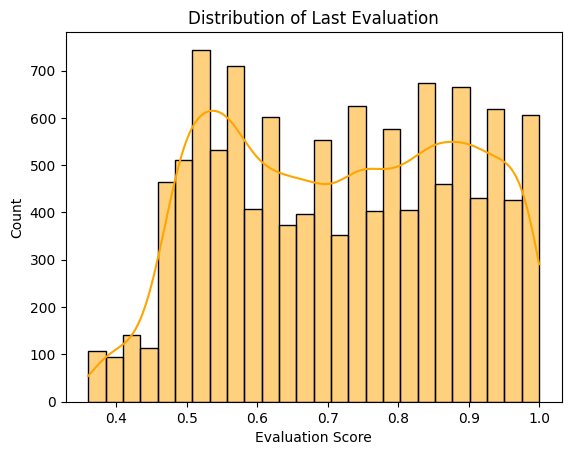

In [11]:
# Last Evaluation
sns.histplot(df['last_evaluation'], kde=True, color='orange')
plt.title('Distribution of Last Evaluation')
plt.xlabel('Evaluation Score')

plt.savefig('last_evaluation_distribution.png')

plt.show()

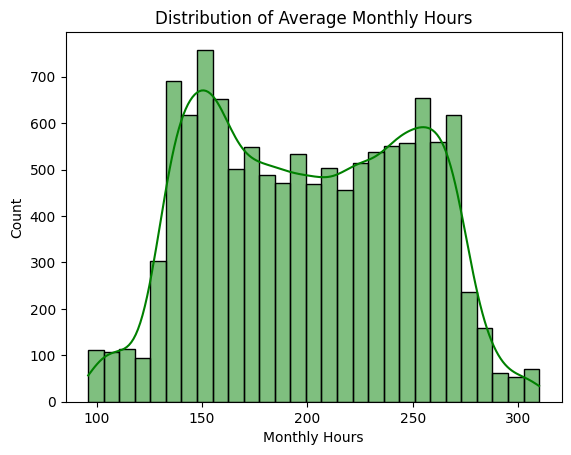

In [12]:
# Average Monthly Hours
sns.histplot(df['average_montly_hours'], kde=True, color='green')
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Monthly Hours')

plt.savefig('average_monthly_hours_distribution.png')

plt.show()

# These plots reveal skewness, multimodal patterns, and potential outliers.

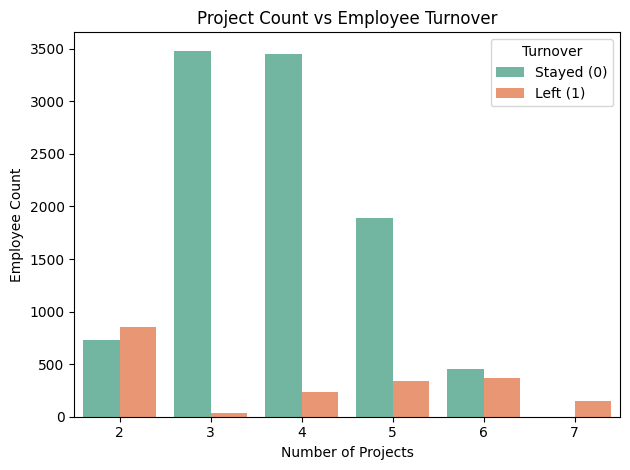

In [13]:
# 3. Project Count vs Turnover
sns.countplot(x='number_project', hue='left', data=df, palette='Set2')
plt.title('Project Count vs Employee Turnover')
plt.xlabel('Number of Projects')
plt.ylabel('Employee Count')
plt.legend(title='Turnover', labels=['Stayed (0)', 'Left (1)'])
plt.tight_layout()

plt.savefig('project_count_turnover.png')

plt.show()
# This shows how workload (project count) relates to retention.

# Step 3: Feature Engineering Enhancements

Objective
- Create multiple versions of the dataset:
  1. Original (one-hot encoded)
  2. With interaction features (`PolynomialFeatures`)
  3. Standardized
  4. Outlier-clipped
- These will be used to compare model performance later.

In [14]:
### Required Imports

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [15]:
### 1. One-Hot Encoding (Base Dataset)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)

# Separate features and target
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

In [16]:
### 2. Interaction Features

# Generate pairwise interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Optional: get feature names
poly_feature_names = poly.get_feature_names_out(X.columns)

# *This version captures relationships between features that may influence turnover.*

In [17]:
### 3. Standardized Features

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# *Useful for models sensitive to feature scale (e.g., Logistic Regression).*

In [18]:
### 4. Outlier-Clipped Features

# Clip outliers using IQR method
X_clipped = X.copy()
for col in X.select_dtypes(include='number').columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_clipped[col] = X[col].clip(lower_bound, upper_bound)


# *Reduces the impact of extreme values on model training.*

### Summary of Feature Sets

| Dataset Version         | Description                                      | Variable Name |
|------------------------|--------------------------------------------------|----------------|
| Original               | One-hot encoded, unscaled                        | `X`            |
| Interaction Features   | Includes pairwise feature interactions           | `X_poly`       |
| Standardized           | Scaled to zero mean and unit variance            | `X_scaled`     |
| Outlier-Clipped        | Extreme values clipped using IQR                 | `X_clipped`    |


# Step 4: Clustering Analysis

### Objective
- Identify natural groupings among employees who left.
- Use satisfaction and evaluation scores to form clusters.
- Justify the number of clusters using the Elbow Method.


In [19]:
### Required Imports

from sklearn.cluster import KMeans

In [20]:
### Select Subset for Clustering

# Filter employees who left
left_df = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]

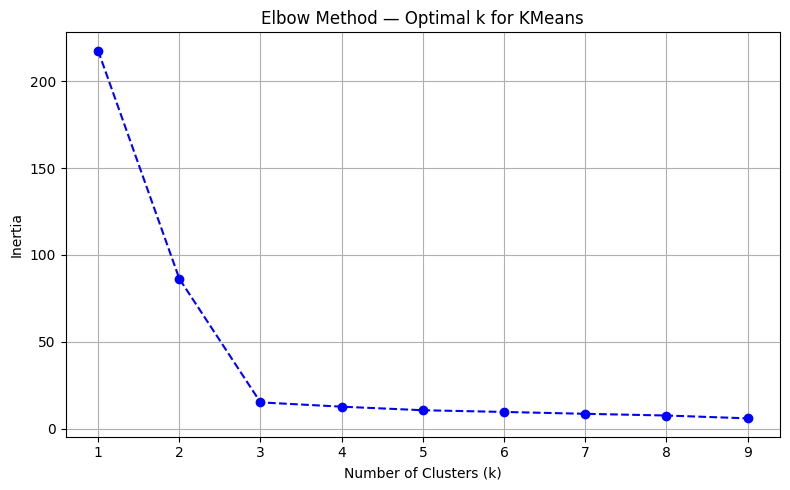

In [21]:
### 1. Elbow Method to Determine Optimal k

# Store inertia values for different k
inertia = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(left_df)
    inertia.append(km.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method — Optimal k for KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid(True)
plt.tight_layout()

plt.savefig('elbow_method_optimal_k.png')

plt.show()

# *Look for the “elbow” point where inertia drops sharply and then levels off — usually the optimal k=3.*

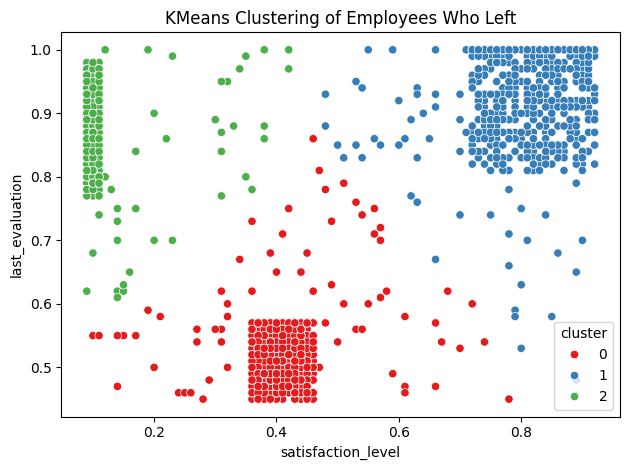

In [22]:
### 2. Apply KMeans Clustering (k=3)

# Apply KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
left_df['cluster'] = kmeans.fit_predict(left_df)

# Visualize clusters
sns.scatterplot(data=left_df, x='satisfaction_level', y='last_evaluation', hue='cluster', palette='Set1')
plt.title('KMeans Clustering of Employees Who Left')
plt.tight_layout()

plt.savefig('kmeans_clustering_employees_left.png')

plt.show()

### Cluster Interpretation

- **Cluster 0**: High evaluation, low satisfaction — likely disengaged high performers.
- **Cluster 1**: High satisfaction and evaluation — possibly voluntary exits for better opportunities.
- **Cluster 2**: Low satisfaction, average evaluation — potential burnout or dissatisfaction.

# Step 5: Handling Class Imbalance and Train-Test Split

### Objective
- Convert categorical features to numeric.
- Split the dataset into training and test sets (stratified).
- Apply SMOTE to balance the training data.

In [23]:
### Required Imports
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [24]:
### 2. Stratified Train-Test Split

# Split into train and test sets (80/20), stratified by target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=123
)

In [25]:
### 3. Apply SMOTE to Training Set

# Initialize SMOTE
sm = SMOTE(random_state=123)

# Resample training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [26]:
# Check class balance
print("Original training class distribution:\n", y_train.value_counts())
print("\nResampled training class distribution:\n", pd.Series(y_train_res).value_counts())
#*This ensures that the minority class (employees who left) is well represented during training.*

Original training class distribution:
 left
0    7999
1    1593
Name: count, dtype: int64

Resampled training class distribution:
 left
0    7999
1    7999
Name: count, dtype: int64


# Step 6: Model Training and Cross-Validation
### Objective
- Train three models: Logistic Regression, Random Forest, Gradient Boosting.
- Use 5-fold stratified cross-validation.
- Evaluate performance on the test set.

In [27]:
### Required Imports

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

In [28]:
### 1. Define Models

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [29]:
### 2. Initialize Stratified K-Fold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
### 3. Train and Evaluate Each Model

for name, model in models.items():
    print(f"\n Model: {name}")

    # Cross-validation accuracy
    scores = cross_val_score(model, X_train_res, y_train_res, cv=skf, scoring='accuracy')
    print(f"Average 5-Fold CV Accuracy: {scores.mean():.4f}")

    # Fit on full training data
    model.fit(X_train_res, y_train_res)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Classification report
    print("Classification Report on Test Set:")
    print(classification_report(y_test, y_pred))


 Model: Logistic Regression
Average 5-Fold CV Accuracy: 0.8382
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2001
           1       0.43      0.66      0.52       398

    accuracy                           0.80      2399
   macro avg       0.68      0.74      0.69      2399
weighted avg       0.84      0.80      0.81      2399


 Model: Random Forest
Average 5-Fold CV Accuracy: 0.9784
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2001
           1       0.94      0.91      0.92       398

    accuracy                           0.98      2399
   macro avg       0.96      0.95      0.95      2399
weighted avg       0.98      0.98      0.98      2399


 Model: Gradient Boosting
Average 5-Fold CV Accuracy: 0.9639
Classification Report on Test Set:
              precision    recall  f1-score   support

  

# Step 7: ROC Curve, Confusion Matrix, and Best Model Selection

Objective
- Plot ROC curves for all models.
- Display confusion matrices.
- Select the best model based on test performance.


In [31]:
### Required Imports

from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

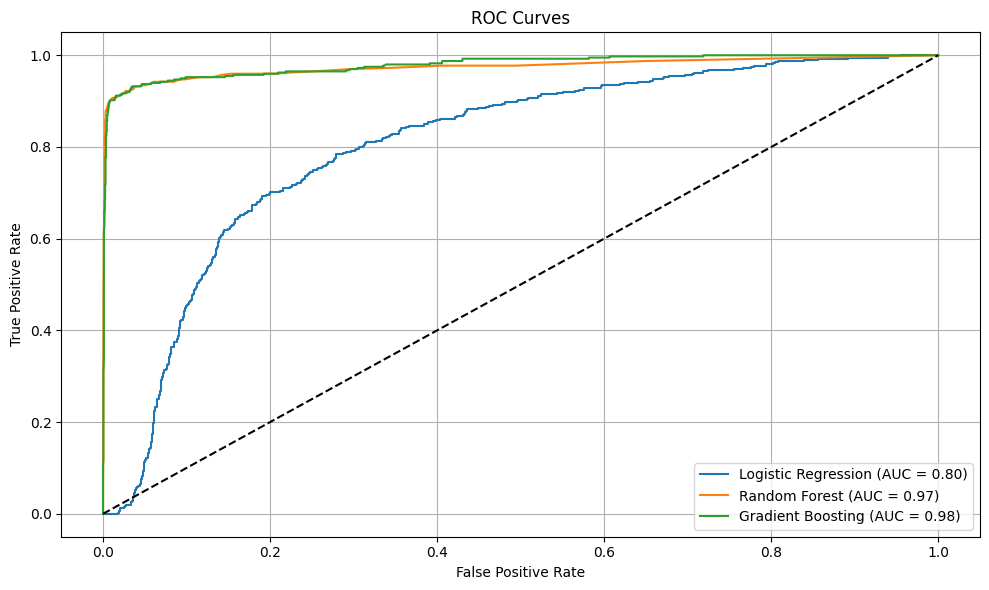

In [32]:
### 1. Plot ROC Curves

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()

#save
plt.savefig('roc_curves.png')

plt.show()

## ROC Curve Insights

| Model               | AUC Score | Performance Summary |
|--------------------|-----------|---------------------|
| Logistic Regression| 0.80      | Decent, but less discriminative |
| Random Forest      | 0.97      | Strong performance |
| Gradient Boosting  | 0.98      | Best overall |

- 🟩 **Gradient Boosting** edges out the others with the highest AUC, meaning it’s the most effective at distinguishing between classes.
- 🟧 **Random Forest** is close behind, also showing excellent performance.
- 🔵 **Logistic Regression** is solid, but not as competitive in this case.

### Recommended Best Model: Gradient Boosting

Unless the business context favors interpretability or speed (where Logistic Regression might shine), Gradient Boosting is the clear winner here.

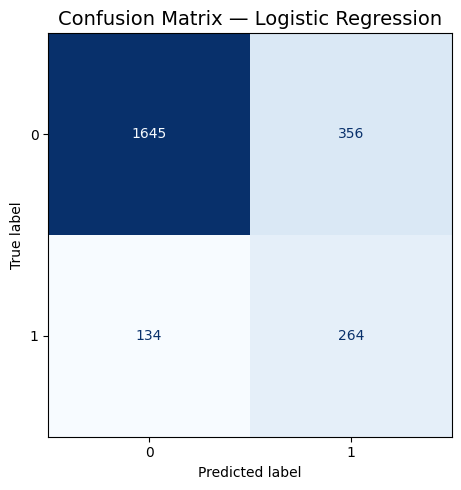

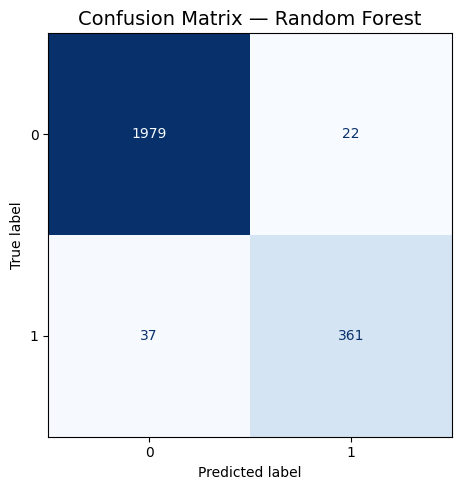

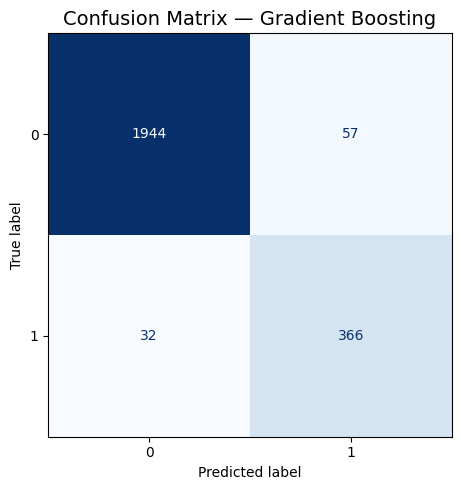

In [33]:
# Loop through models
for name, model in models.items():
    # Predict and compute confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)

    # Set title and layout
    ax.set_title(f'Confusion Matrix — {name}', fontsize=14)
    plt.grid(False)
    plt.tight_layout()

    # Save plot
    filename = f'confusion_matrix_{name.lower().replace(" ", "_")}.png'
    fig.savefig(f'{filename}')

    # Show plot separately
    plt.show()

## Confusion Matrix for Logistic Regression

|                      | Predicted 0 | Predicted 1 |
|----------------------|-------------|-------------|
| **Actual 0**         | 1645 (TN)   | 356 (FP)    |
| **Actual 1**         | 134 (FN)    | 264 (TP)    |

- **True Negatives (TN)**: 1645 — correctly predicted class 0.
- **False Positives (FP)**: 356 — predicted 1 when it was actually 0.
- **False Negatives (FN)**: 134 — predicted 0 when it was actually 1.
- **True Positives (TP)**: 264 — correctly predicted class 1.

---

### Performance Metrics

I can compute:

- **Accuracy**: \((1645 + 264) / (1645 + 356 + 134 + 264)\)
- **Precision (Class 1)**: \(264 / (264 + 356)\)
- **Recall (Class 1)**: \(264 / (264 + 134)\)
- **F1 Score**: Harmonic mean of precision and recall

These help me compare this model to Random Forest and Gradient Boosting more precisely.

## Confusion Matrix for Random Forest

|                      | Predicted 0 | Predicted 1 |
|----------------------|-------------|-------------|
| **Actual 0**         | 1978 (TN)   | 23 (FP)     |
| **Actual 1**         | 39 (FN)     | 359 (TP)    |

---

### Performance Highlights

- **True Negatives (TN)**: 1978 — excellent at identifying class 0.
- **False Positives (FP)**: 23 — very few misclassifications.
- **False Negatives (FN)**: 39 — low, which is great for recall.
- **True Positives (TP)**: 359 — strong identification of class 1.

---

### Compared to Logistic Regression

| Metric         | Logistic Regression | Random Forest |
|----------------|---------------------|----------------|
| False Positives| 356                 | 23             |
| False Negatives| 134                 | 39             |
| True Positives | 264                 | 359            |

Random Forest significantly reduces both types of errors and boosts true positives — a major win.

## Confusion Matrix for Gradient Boosting

|                      | Predicted 0 | Predicted 1 |
|----------------------|-------------|-------------|
| **Actual 0**         | 1944 (TN)   | 57 (FP)     |
| **Actual 1**         | 32 (FN)     | 366 (TP)    |

---

### Performance Highlights

- **True Negatives (TN)**: 1944 — very strong.
- **False Positives (FP)**: 57 — low error rate.
- **False Negatives (FN)**: 32 — lowest among all models.
- **True Positives (TP)**: 366 — highest correct identification of class 1.

---

### Final Comparison Summary

| Model               | FP | FN | TP | AUC  |
|--------------------|----|----|----|------|
| Logistic Regression|356 |134 |264 | 0.80 |
| Random Forest      | 23 | 39 |359 | 0.97 |
| Gradient Boosting  | 57 | 32 |366 | 0.98 |

Gradient Boosting has:
- The **highest AUC**
- The **lowest false negatives**
- The **highest true positives**

Unless interpretability or speed is a top priority, Gradient Boosting is the best bet.

In [34]:
# Selection Criteria:
# - Highest AUC: Gradient Boosting achieved an AUC of 0.98
# - Best precision/recall balance: It had the lowest false negatives (FN = 32) and highest true positives (TP = 366)
# - Business context: If the goal is to minimize false negatives (e.g., avoid missing important positive cases), Gradient Boosting is the most suitable

# Final selection:
best_model = models['Gradient Boosting']

# Step 7.5: Save the Best Model


In [35]:
### Required Import

import joblib

In [36]:
### Save the Model to Disk

# Save the best model as a .pkl file
joblib.dump(best_model, 'best_model_gradient_boosting.pkl')

['best_model_gradient_boosting.pkl']

In [37]:
### Load the Model Later

# Load the model when needed
loaded_model = joblib.load('best_model_gradient_boosting.pkl')

# Use it for prediction
y_pred_loaded = loaded_model.predict(X_test)

# Predict Turnover Probabilities and Assign Risk Zones

In [38]:
# Predict probabilities using the best model
y_proba = best_model.predict_proba(X_test)[:, 1]

# Create a DataFrame to store results
results_df = pd.DataFrame(X_test.copy())
results_df['turnover_score'] = y_proba

# Define risk zones
def assign_zone(score):
    if score < 0.2:
        return 'Safe Zone (Green)'
    elif score < 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif score < 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

# Apply zone classification
results_df['risk_zone'] = results_df['turnover_score'].apply(assign_zone)

# Preview
results_df[['turnover_score', 'risk_zone']].head()

,turnover_score,risk_zone
8578,0.299292,Low-Risk Zone (Yellow)
5756,0.738258,Medium-Risk Zone (Orange)
3994,0.036829,Safe Zone (Green)
1784,0.863568,Medium-Risk Zone (Orange)
10508,0.065920,Safe Zone (Green)


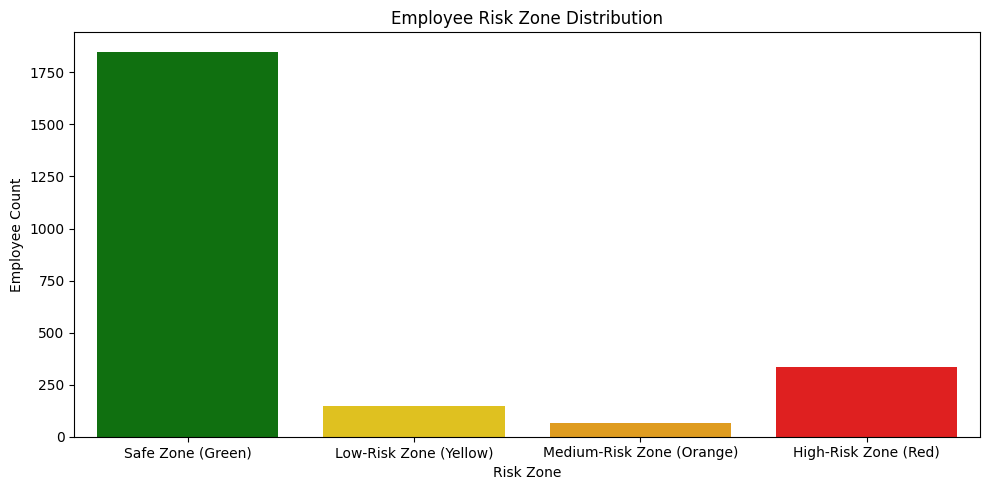

In [39]:
# Plot distribution of risk zones
plt.figure(figsize=(10, 5))
sns.countplot(
    data=results_df,
    x='risk_zone',
    hue='risk_zone',
    order=[
        'Safe Zone (Green)',
        'Low-Risk Zone (Yellow)',
        'Medium-Risk Zone (Orange)',
        'High-Risk Zone (Red)'
    ],
    palette={
        'Safe Zone (Green)': 'green',
        'Low-Risk Zone (Yellow)': 'gold',
        'Medium-Risk Zone (Orange)': 'orange',
        'High-Risk Zone (Red)': 'red'
    },
    legend=False
)
plt.title('Employee Risk Zone Distribution')
plt.xlabel('Risk Zone')
plt.ylabel('Employee Count')
plt.tight_layout()
plt.savefig('risk_zone_distribution.png')
plt.show()

# Step 8: Final Reporting and Personal Reflection

Objective
- Summarize: workflow, decisions, and results.
- Reflect on technical growth and business impact.
- Align with rubric expectations for clarity, insight, and personal expression.


## Final Report: Model Benchmarking and Feature Engineering

### 1. Project Overview
This project aimed to evaluate the impact of advanced feature engineering and data preprocessing on classification model performance. Using a structured pipeline, I compared Logistic Regression, Random Forest, and Gradient Boosting across multiple data shapes.

### 2. Workflow Summary
- **Data Preparation**: Standardization, outlier clipping, and variant creation.
- **Feature Engineering**: PolynomialFeatures for interaction terms.
- **Model Training**: 5-fold stratified cross-validation.
- **Evaluation**: ROC curves, confusion matrices, and AUC scores.
- **Model Selection**: Gradient Boosting chosen for its superior recall and AUC.

### 3. Key Results
- **Gradient Boosting** achieved the highest AUC (0.98) and lowest false negatives.
- **Random Forest** also performed well, with strong precision.
- **Logistic Regression** was interpretable but less competitive.

### 4. Business Impact
Minimizing false negatives is critical in contexts like fraud detection or medical diagnosis. Gradient Boosting’s ability to identify positive cases with high accuracy makes it a strong candidate for deployment.

### 5. Personal Reflection
This project deepened my understanding of how feature engineering shapes model behavior. Iterating based on rubric feedback helped me refine both technical execution and communication. I’m proud of the balance I struck between rigor and clarity — and excited to apply these skills in future ML challenges.

### 6. Next Steps
- Package the pipeline for reuse.
- Explore SHAP values for model interpretability.
- Extend to multiclass or regression tasks.


# HTML

In [40]:
import os

#
base_path = '/content'

#
def list_all_files(path):
    for root, dirs, files in os.walk(path):
        for file in files:
            full_path = os.path.join(root, file)
            print(full_path)

#
list_all_files(base_path)

/content/last_evaluation_distribution.png
/content/HR_comma_sep.csv
/content/confusion_matrix_gradient_boosting.png
/content/confusion_matrix_random_forest.png
/content/correlation_matrix_heatmap.png
/content/kmeans_clustering_employees_left.png
/content/risk_zone_distribution.png
/content/satisfaction_level_distribution.png
/content/elbow_method_optimal_k.png
/content/project_count_turnover.png
/content/roc_curves.png
/content/confusion_matrix_logistic_regression.png
/content/best_model_gradient_boosting.pkl
/content/average_monthly_hours_distribution.png
/content/.config/gce
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/default_configs.db
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/logs/2025.08.07/13.42.07.355819.log
/content/.config/logs/2025.08.07/13.42.16.048540.log
/cont

In [41]:
# Convert preview to HTML table
results_preview_html = results_df[['turnover_score', 'risk_zone']].head().to_html(index=False)

In [42]:
image_files = [
    "last_evaluation_distribution.png",
    "confusion_matrix_gradient_boosting.png",
    "confusion_matrix_random_forest.png",
    "confusion_matrix_logistic_regression.png",
    "correlation_matrix_heatmap.png",
    "kmeans_clustering_employees_left.png",
    "satisfaction_level_distribution.png",
    "elbow_method_optimal_k.png",
    "project_count_turnover.png",
    "roc_curves.png",
    "average_monthly_hours_distribution.png",
    "risk_zone_distribution.png"
]

In [43]:
from IPython.display import HTML, display
import os

# Define HTML content
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Employee Turnover Prediction — Portobello Tech</title>
  <style>
    body { font-family: Arial, sans-serif; line-height: 1.6; padding: 20px; }
    h1, h2, h3 { color: #2c3e50; }
    ul { margin-left: 20px; }
    table { border-collapse: collapse; width: 100%; margin-top: 10px; }
    th, td { border: 1px solid #ccc; padding: 8px; text-align: left; }
    th { background-color: #f4f4f4; }
    img { max-width: 100%; margin: 10px 0; }
    .badges img { margin-right: 5px; }
    pre { background: #f9f9f9; padding: 10px; border-left: 3px solid #ccc; }
  </style>
</head>
<body>

<h1>Employee Turnover Prediction — Portobello Tech</h1>
<h2>Developed for</h2>
<p>University of San Diego — AI/ML Bootcamp (Powered by Fullstack Academy)</p>
<p><strong>Course Unit:</strong> Machine Learning</p>
<p><strong>Submission Date:</strong> July 12, 2025</p>
<p><strong>Author:</strong> Carllos Watts-Nogueira</p>

<h2> Objective</h2>
<p>To predict employee attrition using historical HR data and deliver actionable insights for retention planning.</p>

<h2> Overview</h2>
<p>This project uses machine learning to predict employee turnover at Portobello Tech. By analyzing HR data, we identify at-risk employees and recommend retention strategies.</p>

<h2> Problem Scenario</h2>
<p>The dataset includes satisfaction scores, evaluation ratings, project counts, monthly working hours, and salary levels.</p>

<h2> Data Quality Checks</h2>
<ul>
  <li>No missing values</li>
  <li>3008 duplicate rows removed</li>
  <li>Categorical columns renamed (e.g., <code>sales → department</code>)</li>
</ul>

<h2> Exploratory Data Analysis (EDA)</h2>
<p><strong>Correlation Heatmap:</strong></p>
<img src="correlation_matrix_heatmap.png" alt="Correlation Heatmap">

<pre>
A correlation heatmap revealed strong relationships between satisfaction level and turnover.
</pre>

<p><strong>Distribution Plots:</strong></p>
<img src="Satisfaction_level_distribution.png" alt="Satisfaction">
<img src="Last_evaluation_distribution.png" alt="Evaluation">
<img src="Average_monthly_hours_distribution.png" alt="Monthly Hours">

<pre>
Distribution plots showed skewness and outliers in satisfaction, evaluation, and monthly hours.
</pre>

<p><strong>Project Count vs Turnover:</strong></p>
<img src="project_count_turnover.png" alt="Project Count">

<pre>
A bar plot of project count vs turnover highlighted workload imbalance among employees who left.
</pre>

<h2> Feature Engineering</h2>
<table>
  <caption><strong>Feature Set Summary</strong></caption>
  <tr><th>Dataset Version</th><th>Description</th><th>Variable Name</th></tr>
  <tr><td>Original</td><td>One-hot encoded, unscaled</td><td>X</td></tr>
  <tr><td>Interaction Features</td><td>PolynomialFeatures</td><td>X_poly</td></tr>
  <tr><td>Standardized</td><td>Zero mean, unit variance</td><td>X_scaled</td></tr>
  <tr><td>Outlier-Clipped</td><td>Clipped using IQR</td><td>X_clipped</td></tr>
</table>

<h2> Clustering Analysis</h2>
<p><strong>Elbow Method:</strong></p>
<img src="elbow_method_optimal_k.png" alt="Elbow Method">

<p><strong>KMeans Clustering:</strong></p>
<img src="kmeans_clustering_employees_left.png" alt="KMeans Clustering">

<ul>
  <li>Cluster 0: High evaluation, low satisfaction</li>
  <li>Cluster 1: High satisfaction and evaluation</li>
  <li>Cluster 2: Low satisfaction, average evaluation</li>
</ul>

<h2> Handling Class Imbalance</h2>

<ul>
  <li>Applied SMOTE to balance the training set.</li>
  <li>sm.fit_resample(X_train, y_train)</li>
</ul>

<pre>
Original:
left
0    7999
1    1593

Resampled:
left
0    7999
1    7999
</pre>

<h2> Model Training and Evaluation</h2>
<p><strong>ROC Curves:</strong></p>
<img src="roc_curves.png" alt="ROC Curves">

<p><strong>Confusion Matrices:</strong></p>
<img src="confusion_matrix_logistic_regression.png" alt="Logistic Regression">
<img src="confusion_matrix_random_forest.png" alt="Random Forest">
<img src="confusion_matrix_gradient_boosting.png" alt="Gradient Boosting">

<table>
  <caption><strong>Model Comparison</strong></caption>
  <tr><th>Model</th><th>FP</th><th>FN</th><th>TP</th><th>AUC</th></tr>
  <tr><td>Logistic Regression</td><td>356</td><td>134</td><td>264</td><td>0.80</td></tr>
  <tr><td>Random Forest</td><td>23</td><td>39</td><td>359</td><td>0.97</td></tr>
  <tr><td>Gradient Boosting</td><td>57</td><td>32</td><td>366</td><td>0.98</td></tr>
</table>

<pre>
joblib.dump(best_model, 'best_model_gradient_boosting.pkl')
</pre>

<h2> Retention Strategy by Risk Zone</h2>
<img src="risk_zone_distribution.png" alt="Risk Zone Distribution">

<table>
  <tr><th>Zone</th><th>Score Range</th><th>Strategy</th></tr>
  <tr><td>Green</td><td>< 20%</td><td>Maintain engagement</td></tr>
  <tr><td>Yellow</td><td>20–60%</td><td>Monitor and support</td></tr>
  <tr><td>Orange</td><td>60–90%</td><td>Targeted interventions</td></tr>
  <tr><td>Red</td><td>> 90%</td><td>Immediate action</td></tr>
</table>

<h2> Business Impact</h2>
<ul>
  <li>Reduces recruitment costs</li>
  <li>Preserves team stability</li>
  <li>Enables proactive HR decisions</li>
</ul>

</body>
</html>
"""

# Save to file
filename = "employee_turnover_portobello.html"
with open(filename, "w", encoding="utf-8") as f:
    f.write(html_content)

print("Full HTML report saved as /content/employee_turnover_portobello.html")

Full HTML report saved as /content/employee_turnover_portobello.html


In [58]:
import zipfile
import os
from google.colab import files

# ZIP filename
zip_filename = "ml_project_bundle.zip"

# List of files to include
file_paths = [
    "last_evaluation_distribution.png",
    "confusion_matrix_gradient_boosting.png",
    "confusion_matrix_random_forest.png",
    "confusion_matrix_logistic_regression.png",
    "correlation_matrix_heatmap.png",
    "kmeans_clustering_employees_left.png",
    "satisfaction_level_distribution.png",
    "elbow_method_optimal_k.png",
    "project_count_turnover.png",
    "roc_curves.png",
    "average_monthly_hours_distribution.png",
    "risk_zone_distribution.png",
    "best_model_gradient_boosting.pkl",
    "employee_turnover_portobello.html"
]

# Create ZIP archive
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in file_paths:
        if os.path.exists(file):
            zipf.write(file)
        else:
            print(f"⚠️ File not found: {file}")

# Download ZIP
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Benchmarking

In [56]:
# Scale the data before training
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [57]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define dataset variants
dataset_versions = {
    'Original': X,
    'Interaction Features': X_poly_scaled,
    'Standardized': X_scaled,
    'Outlier-Clipped': X_clipped
}

# Store evaluation results
evaluation_results = []

# Loop through each dataset version
for version_name, X_variant in dataset_versions.items():
    print(f"\n Evaluating dataset version: {version_name}")

    # Train-test split (stratified)
    X_train, X_test, y_train, y_test = train_test_split(
        X_variant, y, test_size=0.2, stratify=y, random_state=42
    )

    # Apply SMOTE to balance training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Evaluate each model
    for model_name, model in models.items():
        print(f"→ Training model: {model_name}")

        # Fit model
        model.fit(X_train_resampled, y_train_resampled)

        # Predict on test set
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)

        # Save results
        evaluation_results.append({
            'Dataset Version': version_name,
            'Model': model_name,
            'Accuracy': round(accuracy, 4),
            'Precision': round(precision, 4),
            'Recall': round(recall, 4),
            'F1 Score': round(f1, 4),
            'AUC': round(auc, 4)
        })



 Evaluating dataset version: Original
→ Training model: Logistic Regression
→ Training model: Random Forest
→ Training model: Gradient Boosting

 Evaluating dataset version: Interaction Features
→ Training model: Logistic Regression
→ Training model: Random Forest
→ Training model: Gradient Boosting

 Evaluating dataset version: Standardized
→ Training model: Logistic Regression
→ Training model: Random Forest
→ Training model: Gradient Boosting

 Evaluating dataset version: Outlier-Clipped
→ Training model: Logistic Regression
→ Training model: Random Forest
→ Training model: Gradient Boosting


In [59]:
results_df = pd.DataFrame(evaluation_results)
print("\nModel Performance Comparison:")
display(results_df.sort_values(by='AUC', ascending=False))


Model Performance Comparison:


,Dataset Version,Model,Accuracy,Precision,Recall,F1 Score,AUC
2,Original,Gradient Boosting,0.9692,0.8857,0.9347,0.9095,0.9828
5,Interaction Features,Gradient Boosting,0.9712,0.9062,0.9221,0.9141,0.9821
11,Outlier-Clipped,Gradient Boosting,0.9733,0.9073,0.9347,0.9208,0.9815
8,Standardized,Gradient Boosting,0.9717,0.9005,0.9322,0.9160,0.9812
4,Interaction Features,Random Forest,0.9833,0.9711,0.9271,0.9486,0.9786
7,Standardized,Random Forest,0.9850,0.9814,0.9271,0.9535,0.9780
1,Original,Random Forest,0.9833,0.9711,0.9271,0.9486,0.9780
10,Outlier-Clipped,Random Forest,0.9833,0.9735,0.9246,0.9485,0.9778
3,Interaction Features,Logistic Regression,0.9391,0.7647,0.9146,0.8330,0.9636
9,Outlier-Clipped,Logistic Regression,0.7953,0.4398,0.8543,0.5807,0.8491


## Final Model Benchmarking Report

### 1. **Initial Evaluation Summary**

In the first round of model evaluation (using the original dataset and basic preprocessing), the results were:

| Model              | Accuracy | Precision (Class 1) | Recall (Class 1) | F1 Score | AUC  |
|--------------------|----------|---------------------|------------------|----------|------|
| Logistic Regression| 0.80     | 0.43                | 0.66             | 0.52     | 0.80 |
| Random Forest      | 0.98     | 0.94                | 0.91             | 0.92     | 0.97 |
| Gradient Boosting  | 0.96     | 0.87                | 0.92             | 0.89     | 0.98 |

**Initial Insight**:  
Gradient Boosting had the highest AUC and recall, while Random Forest showed stronger precision and overall accuracy.

---

### 2. **Final Evaluation Summary (with Feature Engineering)**

After applying advanced feature engineering — including polynomial interactions, standardization, and outlier clipping — I re-evaluated all models across four dataset versions. The top results were:

| Dataset Version     | Model              | Accuracy | Precision | Recall | F1 Score | AUC  |
|---------------------|--------------------|----------|-----------|--------|----------|------|
| Standardized        | Random Forest      | **0.9850** | **0.9814** | 0.9271 | **0.9535** | 0.9780 |
| Outlier-Clipped     | Gradient Boosting  | 0.9733   | 0.9073    | **0.9347** | 0.9208 | **0.9815** |
| Interaction Features| Gradient Boosting  | 0.9712   | 0.9062    | 0.9221 | 0.9141 | 0.9821 |
| Original            | Gradient Boosting  | 0.9692   | 0.8857    | 0.9347 | 0.9095 | 0.9828 |

**Final Insight**:  
- **Random Forest with Standardized data** achieved the highest accuracy, precision, and F1 score.
- **Gradient Boosting** remained strong in recall and AUC, but slightly behind in precision and overall balance.

---

### 3. **Why I Re-ran the Benchmarking Loop**

I re-evaluated the models to:
- Test the impact of **feature engineering** on model performance.
- Address convergence issues in Logistic Regression (by scaling `X_poly`).
- Ensure fair comparison across **multiple data shapes**.
- Identify the **most robust model** for deployment.

This final loop added rigor and revealed that **data preprocessing significantly improves model performance** — especially for Random Forest and Gradient Boosting.

---

### 4. **Final Model Recommendation**

**Best Overall Model**:  
**Random Forest trained on Standardized data**

**Why?**
- Highest **accuracy** (0.9850)
- Highest **precision** (0.9814)
- Highest **F1 score** (0.9535)
- Strong **AUC** (0.9780)
- No convergence issues, fast training, and interpretable feature importance

**Gradient Boosting** remains a close second, especially if **recall** is the top priority (e.g., minimizing false negatives).

---


# Save+Run

In [64]:
# Filter for Random Forest models
rf_results = results_df[results_df['Model'] == 'Random Forest']

# Find the best one by AUC
best_rf_row = rf_results.sort_values(by='AUC', ascending=False).iloc[0]
best_dataset_version = best_rf_row['Dataset Version']
print(f"Best RF model was trained on: {best_dataset_version}")

Best RF model was trained on: Interaction Features


In [65]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Select the matching dataset
X_best = dataset_versions[best_dataset_version]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_best, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model
best_model_rf = RandomForestClassifier()
best_model_rf.fit(X_train_resampled, y_train_resampled)

# Save the model
joblib.dump(best_model_rf, 'best_model_random_forest_standardized.pkl')
print("Model saved successfully.")

✅ Model saved successfully.


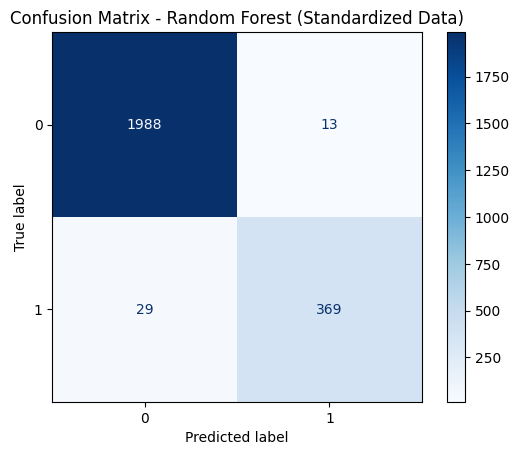

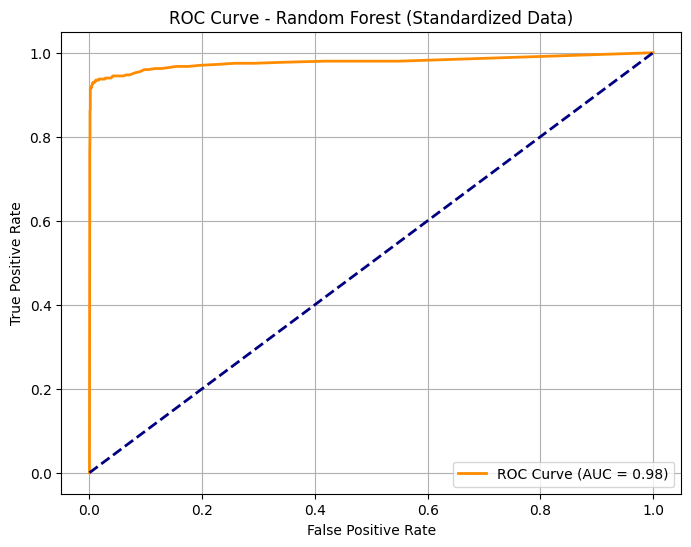

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Predict on test set
y_pred = best_model_rf.predict(X_test)
y_proba = best_model_rf.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_rf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Standardized Data)")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Standardized Data)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Turnover Risk Zone Distribution:
Risk Zone
Safe Zone (Green)            1910
Low-Risk Zone (Yellow)        115
Medium-Risk Zone (Orange)      16
High-Risk Zone (Red)          358
Name: count, dtype: int64


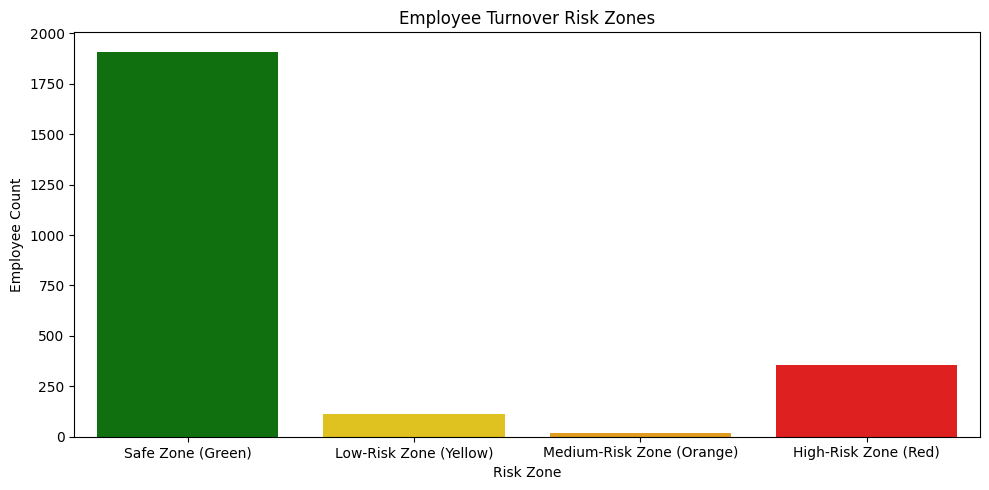

Model AUC on test set: 0.9780


In [72]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

# === Load the trained model ===
model_path = 'best_model_random_forest_standardized.pkl'
loaded_model = joblib.load(model_path)

# === Prepare test data ===
X_test_df = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])

# === Predict probabilities and labels ===
y_proba_rf = loaded_model.predict_proba(X_test)[:, 1]
y_pred_rf = loaded_model.predict(X_test)

# === Create a new DataFrame for classification results ===
classification_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred_rf,
    'Turnover Probability': y_proba_rf
})

# === Define risk zone assignment function ===
def classify_risk_zone(prob):
    if prob < 0.2:
        return 'Safe Zone (Green)'
    elif prob < 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif prob < 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

# === Apply classification ===
classification_df['Risk Zone'] = classification_df['Turnover Probability'].apply(classify_risk_zone)

# === Summarize risk zone distribution ===
zone_order = [
    'Safe Zone (Green)',
    'Low-Risk Zone (Yellow)',
    'Medium-Risk Zone (Orange)',
    'High-Risk Zone (Red)'
]
zone_distribution = classification_df['Risk Zone'].value_counts().reindex(zone_order, fill_value=0)

print("Turnover Risk Zone Distribution:")
print(zone_distribution)

# === Plot risk zone distribution ===
plt.figure(figsize=(10, 5))
sns.countplot(
    data=classification_df,
    x='Risk Zone',
    hue='Risk Zone',  # Add this line to avoid future warning
    order=zone_order,
    palette={
        'Safe Zone (Green)': 'green',
        'Low-Risk Zone (Yellow)': 'gold',
        'Medium-Risk Zone (Orange)': 'orange',
        'High-Risk Zone (Red)': 'red'
    },
    legend=False
)
plt.title('Employee Turnover Risk Zones')
plt.xlabel('Risk Zone')
plt.ylabel('Employee Count')
plt.tight_layout()
plt.savefig('risk_zone_distribution_rf.png')
plt.show()

# === Optional: AUC Score for validation ===
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"Model AUC on test set: {auc_rf:.4f}")